In [1]:
from utils.analysis.make_movies import write_movies_two_component_2d
from utils.analysis.tools import simDir
import os
from utils.file_operations import input_parse
from utils.simulation_helper import set_mesh_geometry
import multiprocessing as mp
import h5py
from utils import plot
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.ndimage import uniform_filter1d, gaussian_filter1d
from scipy.interpolate import splrep, splev

In [2]:
from pathlib import Path
import subprocess

In [2]:
root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231117_output")
folders = list(root.glob("./M1*"))

In [2]:
def movies(folder):
    try:
        if os.path.isdir(os.path.join(folder,"movies")):
            return None
        input_params = input_parse(os.path.join(folder,"input_params.txt"))
        movie_params = input_parse("movie_parameters.txt")
        sim_geometry = set_mesh_geometry(input_params)
        write_movies_two_component_2d(folder, "spatial_variables.hdf5", movie_params, sim_geometry.mesh)
    except:
        print(f"Failed {folder}")

In [4]:
root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231202_enhancerTest")
folders = [root / p for p in root.iterdir() if p.match("M1*")]
for folder in folders:
    if not (root / "movies").exists():
        subprocess.run(["sbatch",
                        f"--export=input={folder}",
                        "/nfs/arupclab001/davidgoh/CoupledEPCondensates/utils/analysis/make_movie.slurm"])

Submitted batch job 52667672
Submitted batch job 52667673
Submitted batch job 52667674
Submitted batch job 52667675
Submitted batch job 52667676
Submitted batch job 52667677
Submitted batch job 52667678
Submitted batch job 52667679
Submitted batch job 52667680
Submitted batch job 52667681
Submitted batch job 52667682
Submitted batch job 52667683
Submitted batch job 52667684
Submitted batch job 52667685
Submitted batch job 52667686
Submitted batch job 52667687
Submitted batch job 52667688
Submitted batch job 52667689
Submitted batch job 52667690
Submitted batch job 52667691
Submitted batch job 52667692
Submitted batch job 52667693
Submitted batch job 52667694
Submitted batch job 52667695
Submitted batch job 52667696
Submitted batch job 52667697
Submitted batch job 52667698
Submitted batch job 52667699
Submitted batch job 52667700
Submitted batch job 52667702
Submitted batch job 52667703
Submitted batch job 52667705
Submitted batch job 52667706
Submitted batch job 52667707
Submitted batc

In [8]:
def movies(folder):
    sim = simDir(folder)
    sim.run()
    sim.makeFigure(i=0)
    sim.makeFigure(i=1)

In [11]:
root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231118_output_dt1e0")
folders = [root / p for p in root.iterdir() if p.match("M1*")]
for folder in folders:
    subprocess.run(["sbatch",
                    f"--export=input={folder},fps=30",
                    "/nfs/arupclab001/davidgoh/CoupledEPCondensates/utils/analysis/make_movie.slurm"])
root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231118_output_dt5e-1")
folders = [root / p for p in root.iterdir() if p.match("M1*")]
for folder in folders:
    subprocess.run(["sbatch",
                    f"--export=input={folder},fps=60",
                    "/nfs/arupclab001/davidgoh/CoupledEPCondensates/utils/analysis/make_movie.slurm"])

Submitted batch job 52474067
Submitted batch job 52474068
Submitted batch job 52474069
Submitted batch job 52474070
Submitted batch job 52474071
Submitted batch job 52474073
Submitted batch job 52474074
Submitted batch job 52474075
Submitted batch job 52474076
Submitted batch job 52474077
Submitted batch job 52474078
Submitted batch job 52474079
Submitted batch job 52474080
Submitted batch job 52474081
Submitted batch job 52474082
Submitted batch job 52474083
Submitted batch job 52474084
Submitted batch job 52474085


In [11]:
root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231120_output")
folders = [root / p for p in root.iterdir() if p.match("M1*")]
for folder in folders:
    subprocess.run(["sbatch",
                    f"--export=input={folder}",
                    "/nfs/arupclab001/davidgoh/CoupledEPCondensates/utils/analysis/make_movie.slurm"])


In [2]:
def condensate_property(folder):
    sim = simDir(folder)
    sim.run()
    sim.condensate_property_plot()

In [ ]:
root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231120_output")
folders = [root / p for p in root.iterdir() if p.match("M1*")]
processes = mp.Pool(mp.cpu_count()-1)
processes.map(condensate_property,folders);

In [13]:
def save_com(folder):
    sim = simDir(folder)
    sim.run()
    sim.condensate()
    np.savetxt(folder / "com.txt", sim.com)

In [14]:
root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231120_output")
folders = [root / p for p in root.iterdir() if p.match("M1*")]
processes = mp.Pool(mp.cpu_count()-1)
processes.map(save_com,folders);

In [ ]:
folders = []
root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231118_output_dt1e0")
folders += [root / p for p in root.iterdir() if p.match("M1*")]
root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231118_output_dt5e-1")
folders += [root / p for p in root.iterdir() if p.match("M1*")]
pool = mp.Pool(processes=(mp.cpu_count() - 1))
pool.map(movies,folders)

In [2]:
root = Path(("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/"
            "20231022_output/"
            "M1_1.0_beta_-0.25_gamma_-0.1_kappa_0.05_kprod_0.1_c1Init_3.6_noiseVar_0.0_rxnSigma_2.5_seed_5.5_loc_10"))


In [3]:
sim = simDir(root)
sim.run()

In [4]:
com, e, r = sim.condensate()

In [31]:
from scipy.spatial import  ConvexHull
import scipy.interpolate as interp

points = sim.xy[sim.mask[0]]
hull = ConvexHull(points)
hull_path = hull.vertices
boundary = points[hull_path, :]
# Calculate the cumulative distance along the path
distance = np.cumsum(np.sqrt(np.sum(np.diff(boundary, axis=0)**2, axis=1)))
distance = np.insert(distance, 0, 0)  # Insert a 0 at the beginning


# Interpolate boundary uniformly over the cumulative distance
interp_func = interp.interp1d(distance, boundary, kind='linear', axis=0)
new_distances = np.linspace(0, distance[-1], 1000)
new_points = interp_func(new_distances)

if True:
    # Ensure the path is closed by connecting the last point to the first
    new_points = np.vstack((new_points, new_points[0]))


In [14]:
folders = []
root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231023_output/")
folders += [root / p for p in root.iterdir() if p.match("M1*")]
root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231022_output/")
folders += [root / p for p in root.iterdir() if p.match("M1*")]
root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231021_output/")
folders += [root / p for p in root.iterdir() if p.match("M_1*")]
root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231020_output/")
folders += [root / p for p in root.iterdir() if p.match("M_1*")]

In [ ]:
script = "/nfs/arupclab001/davidgoh/CoupledEPCondensates/utils/analysis/condensate_property_plot.slurm"
for folder in folders:
    subprocess.Popen(["sbatch", f'--export=folder={folder}', script])

In [2]:


def condensate_property_plot(folder):
    cmap = mpl.colormaps["Paired"].colors
    sim = simDir(folder)
    sim.run()
    com, e, r = sim.condensate()
    fig, ax = plt.subplots(2,2)
    axes = np.ravel(ax)
    fig.set_size_inches((6,3))
    x = np.arange(len(com[:,0]))
    y = com[:,0]
    f = gaussian_filter1d(y,15)
    axes[0].plot(y,
                    label="Raw",
                    color=cmap[0])
    axes[0].plot(f,
                    label="Gaussian filter",
                    color=cmap[1])
    axes[0].legend()
    axes[0].set_xlabel("Frame")
    axes[0].set_ylabel("Distance\nfrom locus")
    axes[1].plot(com[:,0],
                    -np.gradient(y),
                    label="Raw",
                    color=cmap[0])
    axes[1].plot(com[:,0],
                    -np.gradient(f),
                    label="Gaussian filter",
                    color=cmap[1])
    axes[1].set_xlabel("Distance\nfrom locus")
    axes[1].set_ylim(bottom=0)
    axes[1].set_ylabel("Condensate\nvelocity")
    axes[1].legend()
    axes[2].plot(e)
    axes[2].set_ylabel("Eccentricity")
    axes[2].set_xlabel("Frame")
    var_r = np.var(r,axis=1)
    axes[3].plot(var_r)
    axes[3].set_ylabel("Radius\nvariance")
    axes[3].set_xlabel("Frame")
    fig.tight_layout()
    fig.savefig(folder / "figures" / "condensate.png")

In [ ]:
pool = mp.Pool(processes=(mp.cpu_count() - 1))
pool.map(condensate_property_plot,folders)

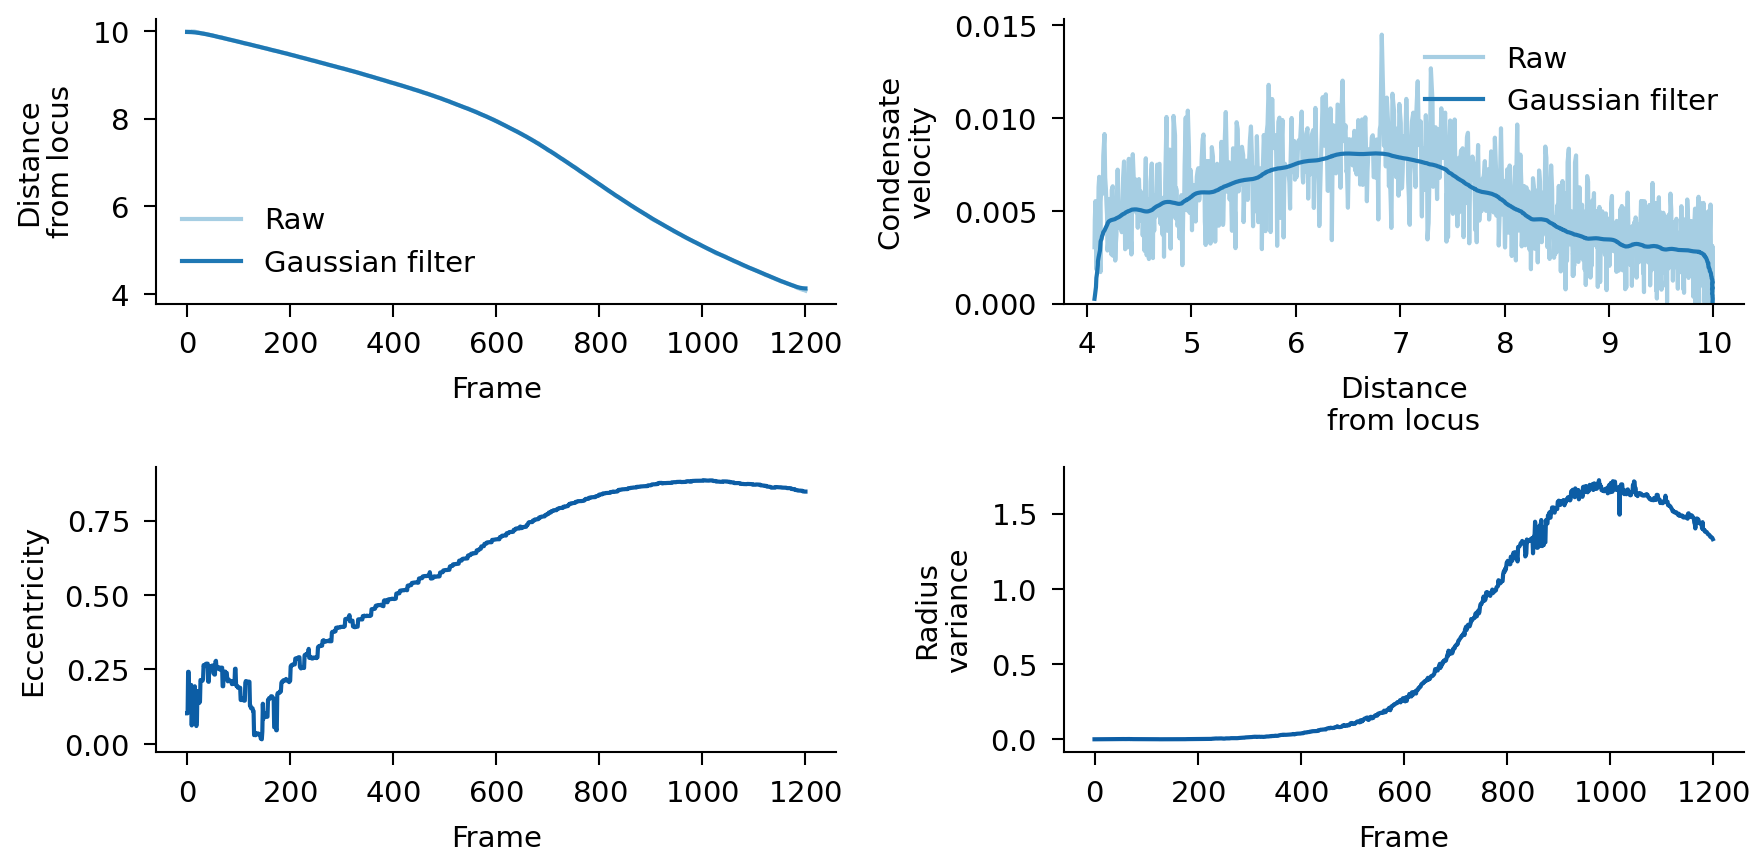

In [4]:
root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231023_output/M1_1.0_beta_-0.25_gamma_-0.1_kappa_0.05_kprod_0.1_c1Init_3.575_noiseVar_0.0_rxnSigma_2.5_seed_5.5_loc_10")
condensate_property_plot(root)

In [ ]:
pool = mp.Pool(processes=(mp.cpu_count() - 1))
pool.map(movies,folders)

In [2]:
folders = []
root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231118_output_dt1e0")
folders += [root / p for p in root.iterdir() if p.match("M1*")]
root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/20231017_flow/20231118_output_dt5e-1")
folders += [root / p for p in root.iterdir() if p.match("M1*")]